In [1]:
import sys
sys.path.append('../utils')

import rasterio
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from tqdm import tqdm
from sklearn.cluster import KMeans

In [2]:
data_dir = Path('../data')
backscatter_tifs = sorted(list(data_dir.glob('./*backscatter*.tif')))
backscatter_tifs

[PosixPath('../data/alos_backscatter_hh.tif'),
 PosixPath('../data/alos_backscatter_hv.tif')]

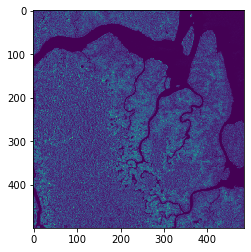

In [3]:
with rasterio.open(backscatter_tifs[0]) as ds:
    hh = ds.read(1)
plt.imshow(hh)


In [4]:
hh_db = 10 * np.log10(hh)

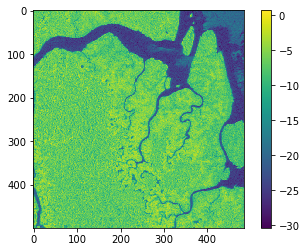

In [5]:
plt.imshow(hh_db)
plt.colorbar()

Text(0.5, 0, '$\\gamma^0$ (db)')

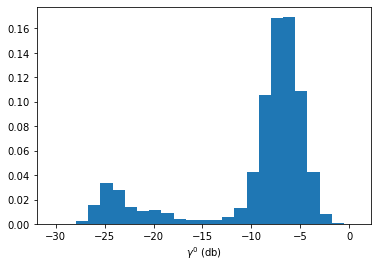

In [6]:
plt.hist(hh_db.ravel(),
         bins=25,
         density=True)
plt.xlabel('$\gamma^0$ (db)')

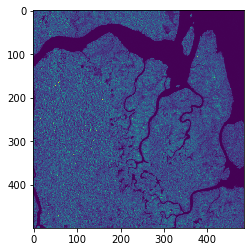

In [7]:
with rasterio.open(backscatter_tifs[1]) as ds:
    hv = ds.read(1)
plt.imshow(hv)

In [8]:
hv_db = 10 * np.log10(hv)

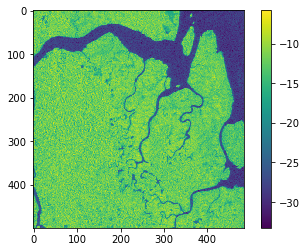

In [9]:
plt.imshow(hv_db)
plt.colorbar()

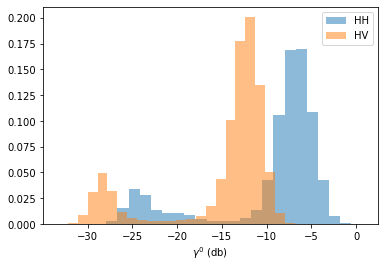

In [10]:
plt.hist(hh_db.ravel(),
         bins=25,
         density=True,
         label='HH',
         alpha=.5)
plt.hist(hv_db.ravel(),
         bins=25,
         density=True,
         label='HV',
         alpha=.5)
plt.xlabel('$\gamma^0$ (db)')
plt.legend()

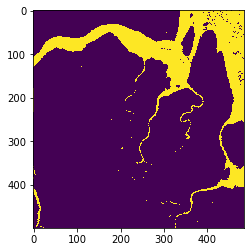

In [11]:
plt.imshow(hh_db < -18)

In [12]:
model = KMeans(n_clusters=2, random_state=0)
model.fit(hh_db.reshape((-1,1)))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

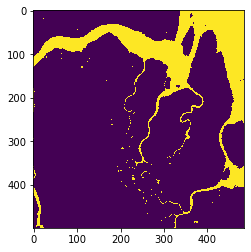

In [13]:
classes = model.labels_.reshape(hh_db.shape)
plt.imshow(classes)

# Excercise 1

What happens to the water mask as you go to lower and lower dbs?

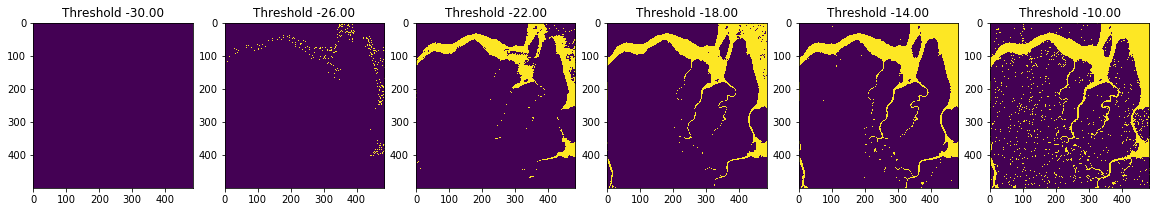

In [14]:
## Answer
N=6
thresh_arr = np.linspace(-30, -10, N)
fig, ax = plt.subplots(1, N, figsize=(20, 10))
for ax, thresh in zip(ax.ravel(), thresh_arr):
    ax.imshow(hh_db < thresh)
    ax.set_title(f'Threshold {thresh:1.2f}')

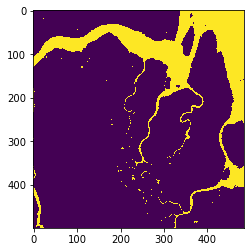

In [15]:
plt.imshow(hh_db < -15)

Write your mask to a tif and see how it looks in QGIS using a basemap.

# Excercise 2

Apply K-means to HH and HV with 3 classes. How does it do? Where are the problem areas?

Write your classes to a file and inspect the results.

In [16]:
## Answer

model_2 = KMeans(n_clusters=3, 
                 random_state=0)
X_train = np.zeros((hh_db.size, 2))
X_train[:, 0] = hh_db.ravel()
X_train[:, 1] = hv_db.ravel()
model_2.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

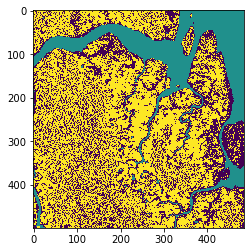

In [17]:
## Answer

classes_2 = model_2.labels_.reshape(hh_db.shape)
plt.imshow(classes_2)

Text(0, 0.5, 'HV (db)')

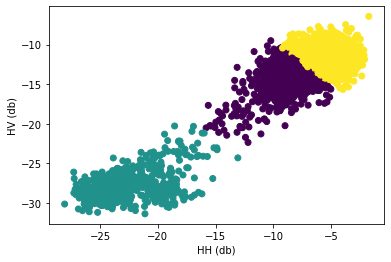

In [18]:
## Answer

N = 4000
indices = np.random.choice(np.arange(hh_db.size), N)
plt.scatter(hh_db.ravel()[indices], hv_db.ravel()[indices], c=classes_2.ravel()[indices])
plt.xlabel('HH (db)')
plt.ylabel('HV (db)')

# Acknowledgements

A portion of this research was performed at the Jet Propulsion Laboratory, California Institute of Technology. Copyright 2019 California Institute of Technology. US Government Support Acknowledged.